In [1]:
import pandas as pd
import numpy as np
import warnings
warnings. filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [82]:
sal=pd.read_csv('ML_1_Salary_pred.csv')

In [3]:
sal

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
# Checking null and blank values
sal.isnull().sum()

# All good here

index                 0
Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree          

In [5]:
sal.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [6]:
sal[['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided','Lower Salary', 'Upper Salary',
       'Avg Salary(K)']]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K)
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5


In [7]:
sal[['company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree']]

,company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Tecolote Research,NM,48,1,0,0,1,0,1,0,...,0,0,1,1,0,0,0,data scientist,na,M
1,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,data scientist,na,M
2,KnowBe4,FL,11,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,data scientist,na,M
3,PNNL,WA,56,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,data scientist,na,na
4,Affinity Solutions,NY,23,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,GSK,MA,191,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,other scientist,sr,M
738,Eventbrite,TN,15,1,1,1,0,1,0,0,...,0,1,0,0,0,0,0,data engineer,sr,na
739,Software Engineering Institute,PA,37,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,other scientist,na,P
740,"Numeric, LLC",PA,-1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,data scientist,na,na


In [8]:
# Dropping some columns, iteration-1, which are absolutely non essential

sal=sal.drop(columns=['index','Job Title','Salary Estimate','Job Description','Company Name','company_txt','Location','Headquarters','Type of ownership','Sector','Revenue','Competitors','Hourly','Employer provided','Lower Salary','Upper Salary'],axis=1)

# Dropping seniority_by_title and Degree as many columns are na

sal=sal.drop(columns=['seniority_by_title','Degree'],axis=1)
sal


,Rating,Size,Founded,Industry,Avg Salary(K),Job Location,Age,Python,spark,aws,...,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim
0,3.8,501 - 1000,1973,Aerospace & Defense,72.0,NM,48,1,0,0,...,0,0,0,0,1,1,0,0,0,data scientist
1,3.4,10000+,1984,Health Care Services & Hospitals,87.5,MD,37,1,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
2,4.8,501 - 1000,2010,Security Services,85.0,FL,11,1,1,0,...,0,0,0,0,0,0,0,0,0,data scientist
3,3.8,1001 - 5000,1965,Energy,76.5,WA,56,1,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
4,2.9,51 - 200,1998,Advertising & Marketing,114.5,NY,23,1,0,0,...,0,0,0,0,0,0,0,0,0,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,10000+,1830,Biotech & Pharmaceuticals,84.5,MA,191,0,0,1,...,0,0,0,0,0,0,0,0,0,other scientist
738,4.4,1001 - 5000,2006,Internet,102.5,TN,15,1,1,1,...,0,0,0,1,0,0,0,0,0,data engineer
739,2.6,501 - 1000,1984,Colleges & Universities,73.5,PA,37,0,0,0,...,0,0,0,0,0,0,0,0,0,other scientist
740,3.2,1 - 50,-1,Staffing & Outsourcing,127.5,PA,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,data scientist


In [9]:
# Handling missing values, some columns have fields -1 or unknown or na. So handling them
# Size has some missing values, checking the average salary for each category and filling the missing elements
# with the closest one

sal.groupby(['Size'])['Avg Salary(K)'].sum().reset_index()

,Size,Avg Salary(K)
0,1 - 50,3257.0
1,10000+,14664.5
2,1001 - 5000,14203.5
3,201 - 500,11729.0
4,5001 - 10000,7409.0
5,501 - 1000,12261.5
6,51 - 200,10506.5
7,unknown,1270.5


In [10]:
# The salary seems to be very less. Checking the actual data and deleting it as it also overlaps with
# Founded column having -1 value

sal.drop(sal[sal['Size']=='unknown'].index,inplace=True)

In [11]:
# Since most of these companies are found in 2010, using this year to fill missing values

sal['Founded'].replace(to_replace=-1,value=2010,inplace=True)
sal['Age'].replace(to_replace=-1,value=11,inplace=True)

In [12]:
sal[sal['job_title_sim']=='na'].index
sal.drop(sal[sal['job_title_sim']=='na'].index,inplace=True)

In [13]:
# # since founded and Age are related, dropping Founded column
sal.drop(columns=['Founded'],inplace=True)

# since industry has one error value, removing that
sal.drop(sal[sal['Industry']=='-1'].index,inplace=True)

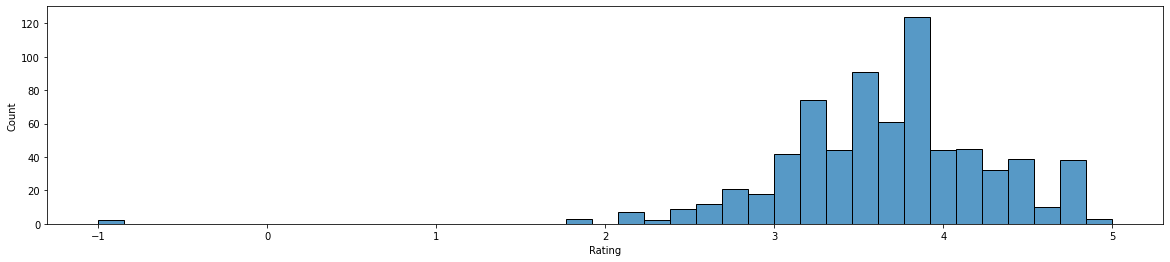

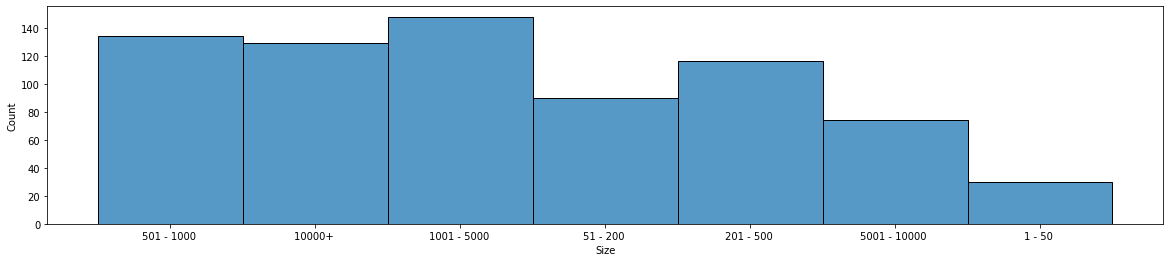

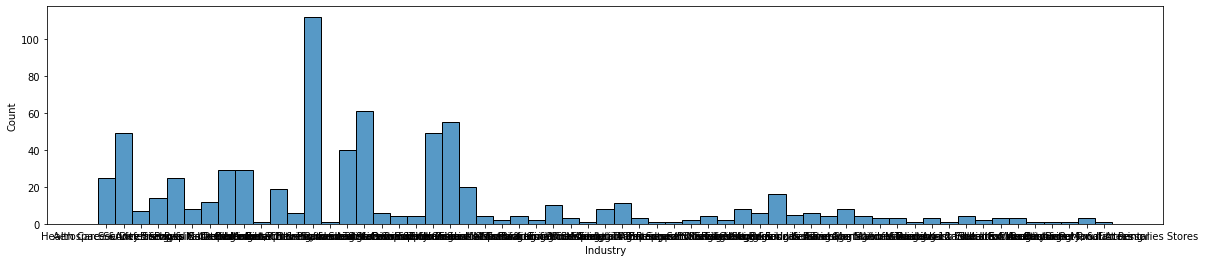

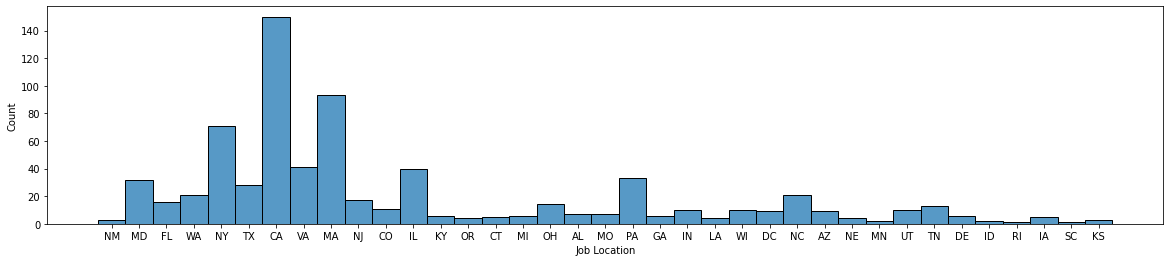

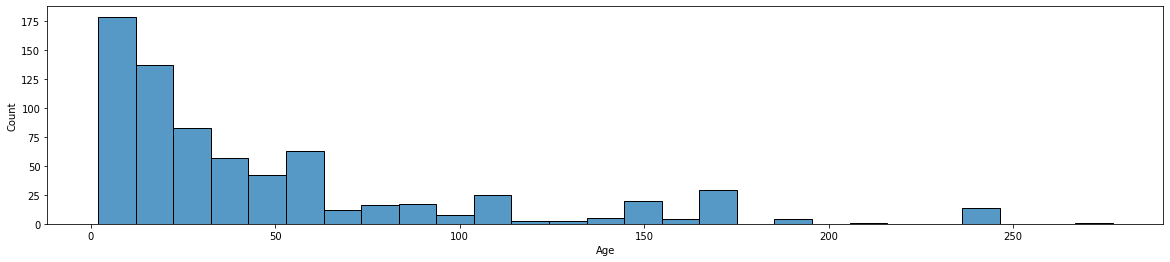

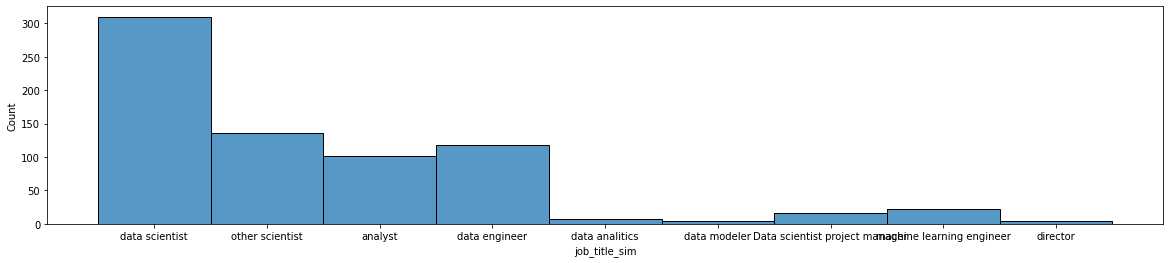

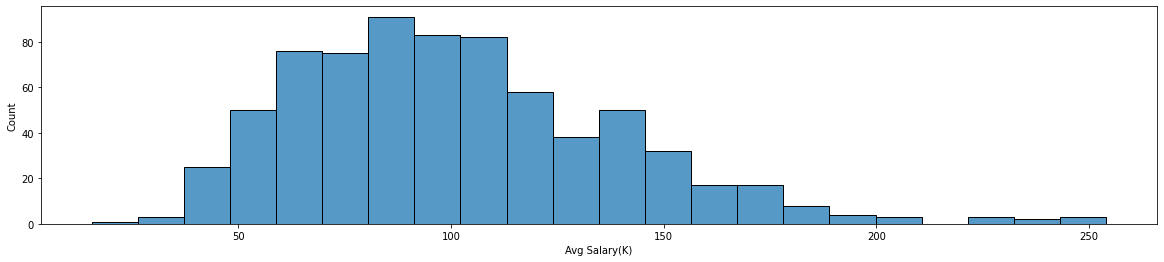

In [14]:
y=['Rating','Size','Industry','Job Location','Age','job_title_sim','Avg Salary(K)']
for pp in y:
    plt.figure(figsize=(20,4))
    sns.histplot(data=sal,x=pp)


In [15]:
# Rating, Age, Average_Salary are continuous variables, rest are categories
# Age and salary are not normalized, and have different scales, standardizing them using log scale-
# https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

sal['Avg_Salary_log']=np.log(sal['Avg Salary(K)'])
sal['Age_log']=np.log(sal['Age'])

sal.drop(columns=['Avg Salary(K)','Age'],inplace=True)

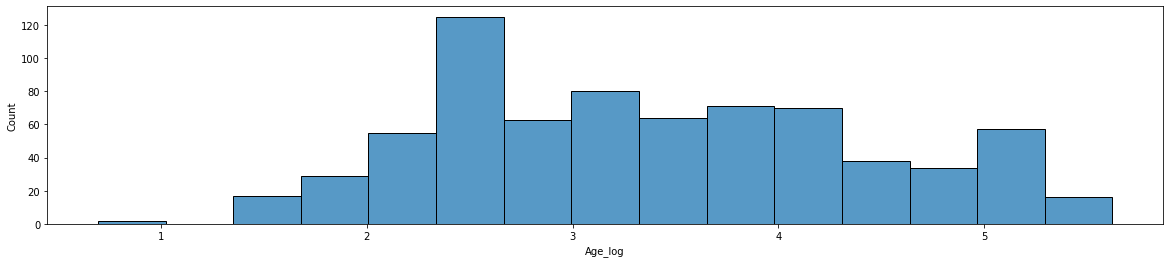

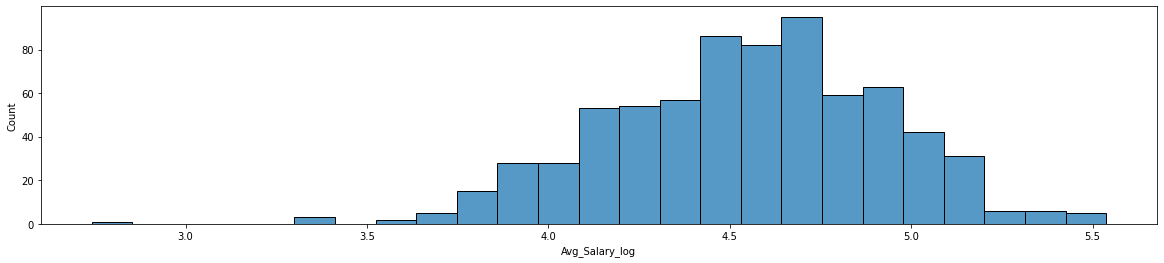

In [16]:
y=['Age_log','Avg_Salary_log']
for pp in y:
    plt.figure(figsize=(20,4))
    sns.histplot(data=sal,x=pp)


In [17]:
sal.head()

,Rating,Size,Industry,Job Location,Python,spark,aws,excel,sql,sas,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,Avg_Salary_log,Age_log
0,3.8,501 - 1000,Aerospace & Defense,NM,1,0,0,1,0,1,...,0,0,1,1,0,0,0,data scientist,4.276666,3.871201
1,3.4,10000+,Health Care Services & Hospitals,MD,1,0,0,0,0,0,...,0,0,0,0,0,0,0,data scientist,4.471639,3.610918
2,4.8,501 - 1000,Security Services,FL,1,1,0,1,1,1,...,0,0,0,0,0,0,0,data scientist,4.442651,2.397895
3,3.8,1001 - 5000,Energy,WA,1,0,0,0,0,0,...,0,0,0,0,0,0,0,data scientist,4.337291,4.025352
4,2.9,51 - 200,Advertising & Marketing,NY,1,0,0,1,1,1,...,0,0,0,0,0,0,0,data scientist,4.740575,3.135494


In [18]:
# Converting categorical values into numerical features aka categorical data encoding
# We can use onehotencoding or get_dummies
# Difference is that for 3 categories, OHE creates 3 columns but dummies creates 2

# For now using dummies as columns created will be less

In [19]:
dummies=pd.get_dummies(sal[['Size','Industry','Job Location','job_title_sim']])
sal_new=pd.concat([sal,dummies],axis=1).drop(columns=['Size','Industry','Job Location','job_title_sim'])

# Building Models 

In [20]:
sal_new.shape

(721, 131)

In [21]:
y_total=sal_new['Avg_Salary_log']
x_total=sal_new.drop(columns=['Avg_Salary_log'])

In [22]:
import random
from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test=train_test_split(x_total,y_total,train_size=0.75,random_state=random.randrange(0,10))
x_train,x_test,y_train,y_test=train_test_split(x_total,y_total,train_size=0.75,random_state=1)


### Linear Regression

In [23]:
# Linear Regression

from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=linear_reg.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

print('mean_squared_error',mean_squared_error(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('r2_score',r2_score(y_test,y_pred))

# r2 error is negative, i.e very poor data fitting, it should be 0 to 1, 1 being good

mean_squared_error 1.1301555384881366e+21
mean_absolute_error 4299983148.346522
r2_score -7.721688445259328e+21


In [26]:
# Except for 3 cases, most of these values have very less difference in predictd and actual values

cc2=pd.concat([x_test.reset_index(),pd.DataFrame(y_test).reset_index(),pd.DataFrame(y_pred)],axis=1)
cc2['diff']=cc2['Avg_Salary_log']-cc2[0]
cc2.sort_values(by=0,ascending=True)

,index,Rating,Python,spark,aws,excel,sql,sas,keras,pytorch,...,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_other scientist,index,Avg_Salary_log,0,diff
74,618,2.7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,618,3.314186,3.590820e+00,-2.766343e-01
104,245,3.8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,245,3.960813,3.610352e+00,3.504616e-01
60,222,2.8,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,222,3.860730,3.803955e+00,5.677463e-02
131,539,3.8,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,539,3.979682,3.872803e+00,1.068789e-01
41,335,3.6,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,335,3.881564,3.881592e+00,-2.799893e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,281,3.9,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,281,4.997212,5.125488e+00,-1.282760e-01
94,76,4.3,1,1,1,1,0,0,1,0,...,0,0,1,0,0,0,76,5.013963,5.185059e+00,-1.710955e-01
2,218,4.3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,218,4.369448,2.383959e+11,-2.383959e+11
92,458,3.5,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,458,4.938065,2.384944e+11,-2.384944e+11


In [27]:
pd.DataFrame(index=x_train.columns,data=linear_reg.coef_, columns=['Coefficients'])

,Coefficients
Rating,7.648797e-02
Python,7.509948e-02
spark,-6.069190e-02
aws,5.408377e-02
excel,3.236375e-03
...,...
job_title_sim_data modeler,2.196258e+11
job_title_sim_data scientist,2.196258e+11
job_title_sim_director,2.196258e+11
job_title_sim_machine learning engineer,2.196258e+11


In [28]:
# High dependence over columns we created using dummies

In [29]:
# other multiple scoring techniques exists

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=10)
score=cross_val_score(linear_reg,x_train,y_train,cv=kf,scoring='r2')
print("Cross Validation Scores are {}`".format(score))
print("Average Cross Validation score :{}".format(score.mean()))


Cross Validation Scores are [-2.80825389e+22 -4.69906089e+19 -3.28167180e+20  4.77014253e-01
 -7.96998489e+20 -1.01413758e+20 -1.96684183e+22  4.17365199e-01
 -1.19092307e+21 -8.18868558e+21]`
Average Cross Validation score :-5.840413591564652e+21


In [30]:
# Clearly linear regression doesn't work well, trying other models

### Using Ridge Regression

In [31]:
# Using Ridge Regression
# loop for multiple values of alpha

from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
for y in range (0,10,2):
    x=y/10
    rr=Ridge(alpha=x)
    rr.fit(x_train,y_train)
    y_pred=rr.predict(x_test)
#     print('For alpha-{} -mean_squared_error:'.format(x),mean_squared_error(y_test,y_pred))
#     print('For alpha-{} -mean_absolute_error:'.format(x),mean_absolute_error(y_test,y_pred))
    print('For alpha-{} -r2 error:'.format(x),r2_score(y_test,y_pred))


For alpha-0.0 -r2 error: -4.646380562519983e+27
For alpha-0.2 -r2 error: 0.4231263040897151
For alpha-0.4 -r2 error: 0.4303511179241669
For alpha-0.6 -r2 error: 0.4340607883882941
For alpha-0.8 -r2 error: 0.43615372665867425


In [32]:
# using cross validation

from sklearn.model_selection import cross_val_score
score_list=[]
alpha_val=[]
for y in range (1,100,2):
    x=y/10
    rr=Ridge(alpha=x)
    kf=KFold(n_splits=5)
    score=cross_val_score(rr,x_train,y_train,scoring='r2',cv=kf)
    alpha_val.append(x)
    score_list.append(score.mean())
#     print('Cross_Validation_Score:',x,score)
#     print ('Mean Score:',x,score.mean())


,alpha_value,score_list
17,3.5,0.46102


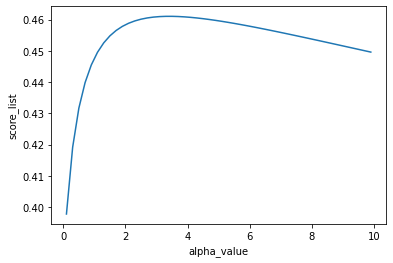

In [33]:
k1=pd.DataFrame(alpha_val).rename(columns={0:'alpha_value'})
k2=pd.DataFrame(score_list).rename(columns={0:'score_list'})
k3=pd.concat([k1,k2],axis=1)

sns.lineplot(x='alpha_value',y='score_list',data=k3)
k3[k3['score_list']==k3['score_list'].max()]

In [34]:
# This is to understand how the ridge and ridgecv operates
# We can't make graphs like above here, it simply tells the best score and best alpha

kf=KFold(n_splits=5)
rr_cv=RidgeCV(alphas=(0.2,0.4,0.6,0.8,1,2,3,3.5,4,4.5,5),scoring='r2',cv=kf)
rr_cv.fit(x_train,y_train).score(x_train,y_train)

print('Best-Cross_validation score: ',rr_cv.best_score_) # This gives the average score of cross-validation
print('Best Alpha: ',rr_cv.alpha_) # This gives the alpha with the best average score of cross-validation

Best-Cross_validation score:  0.461020284268726
Best Alpha:  3.5


In [35]:
# Checking the performance on test data

y_pred=Ridge(alpha=3.5).fit(x_train,y_train).predict(x_test)
print('r2_score: ',r2_score(y_test,y_pred))

# This score is better than linear-regression

r2_score:  0.4381835880907311


### Lasso Regression

In [36]:
# Finding the best alpha using CV

from sklearn.model_selection import cross_val_score

for y in range(0,10,2):
    x=y/10
    kf=KFold(n_splits=5)
    las=Lasso(alpha=x)
    score=cross_val_score(las,x_train,y_train,cv=kf,scoring='r2')
    print('CV score: ',x,score)
    print('CV mean_score: ',x,score.mean())

CV score:  0.0 [0.31008479 0.3804224  0.50676238 0.43207193 0.27311925]
CV mean_score:  0.0 0.3804921487074804
CV score:  0.2 [-0.00180019 -0.09541157 -0.00064887 -0.05188606 -0.00644943]
CV mean_score:  0.2 -0.031239224153635625
CV score:  0.4 [-0.00180019 -0.09541157 -0.00064887 -0.05188606 -0.00644943]
CV mean_score:  0.4 -0.031239224153635625
CV score:  0.6 [-0.00180019 -0.09541157 -0.00064887 -0.05188606 -0.00644943]
CV mean_score:  0.6 -0.031239224153635625
CV score:  0.8 [-0.00180019 -0.09541157 -0.00064887 -0.05188606 -0.00644943]
CV mean_score:  0.8 -0.031239224153635625


In [37]:
from numpy import arange

kf=KFold(n_splits=5)
las_cv=LassoCV(alphas=arange(0,10,.1),cv=kf).fit(x_train,y_train)
score=las_cv.score(x_train,y_train)
print(las_cv.alpha_)


0.0


In [38]:
las=Lasso(alpha=0)
las.fit(x_train,y_train)
y_pred=las.predict(x_test)
print('r2_Score_Lasso: ',r2_score(y_test,y_pred))

r2_Score_Lasso:  0.4072400465461069


### Using Support Vector Machines

In [39]:
from sklearn.svm import SVR
kernels=['linear', 'poly', 'rbf']
for x in kernels:    
    svr=SVR(kernel=x)
    svr.fit(x_train,y_train)
    y_pred=svr.predict(x_test)
    print('r2 score: ',x,r2_score(y_test,y_pred))
    
# Best score among Linear-Regression, Ridge-Regression and Lasso Regression

r2 score:  linear 0.35913247337204146
r2 score:  poly 0.44873056189321514
r2 score:  rbf 0.4938209053853211


### Using Stochastic Gradient Descent

In [40]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
print('r2 score: ',r2_score(y_test,y_pred))


r2 score:  -0.9554480232224798


### PCA

In [41]:
# Using PCA to visualize what is happening
# https://builtin.com/data-science/step-step-explanation-principal-component-analysis

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_train=pca.fit_transform(x_train)
pca_test=pca.transform(x_test)


In [42]:
# To check how much information is retained by Principal components
pca.explained_variance_ratio_

array([0.17225957, 0.09094386])

In [43]:
pca.explained_variance_ratio_.sum()
# Which means the 30 components retains 85% of the information

0.2632034228451795

In [46]:
PC1 = pca_train[:,0]
PC2 = pca_train[:,1]

In [47]:
zipped = list(zip(PC1,PC2))
pc_df = pd.DataFrame(zipped, columns=['PC1','PC2'])

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

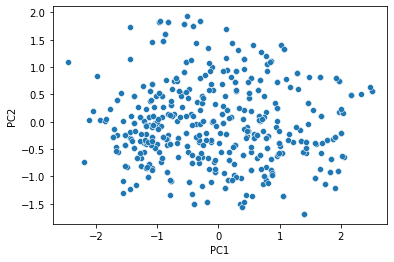

In [48]:
sns.scatterplot(data=pc_df,x='PC1',y='PC2')

In [50]:
# Checking the output if we use PCA on above models

In [51]:
lr_pca=LinearRegression()
ridge_pca=Ridge(alpha=3.5)
las_pca=Lasso(alpha=0)
svr_pca=SVR(kernel='rbf')
sgd_pca=SGDRegressor()

models=[lr_pca,ridge_pca,las_pca,svr_pca,sgd_pca]
for x in models:
    x.fit(pca_train,y_train)
    y_pred=x.predict(pca_test)
    print('r2 score',x,r2_score(y_test,y_pred))


# With PCA, we see the accuracy increases as we increase the principal components

r2 score LinearRegression() 0.08087228681975833
r2 score Ridge(alpha=3.5) 0.08131241585158755
r2 score Lasso(alpha=0) 0.08087228681975833
r2 score SVR() 0.16557743274471637
r2 score SGDRegressor() 0.08099049087389787


In [52]:
# Checking how the accuracy changes with PCA components and drawing graphs

from sklearn.decomposition import PCA
components=[]
var_ratio=[]
model_used=[]
r2_score_model=[]

for n in range (2,50,5):
    
    pca = PCA(n_components=n)
    pca_train=pca.fit_transform(x_train)
    pca_test=pca.transform(x_test)
    print('\nVariance Ratio Sum: ',n,pca.explained_variance_ratio_.sum())
    lr_pca=LinearRegression()
    ridge_pca=Ridge(alpha=3.5)
    las_pca=Lasso(alpha=0)
    svr_pca=SVR(kernel='rbf')
    sgd_pca=SGDRegressor()

    models=[lr_pca,ridge_pca,las_pca,svr_pca,sgd_pca]
    for x in models:
        x.fit(pca_train,y_train)
        y_pred=x.predict(pca_test)
        print('r2 score',x,r2_score(y_test,y_pred))
        components.append(n)
        var_ratio.append(pca.explained_variance_ratio_.sum())
        model_used.append(str(x))
        r2_score_model.append(r2_score(y_test,y_pred)*100.0)
        



Variance Ratio Sum:  2 0.26320342287772036
r2 score LinearRegression() 0.08087218424731457
r2 score Ridge(alpha=3.5) 0.08131230185186855
r2 score Lasso(alpha=0) 0.08087218424731457
r2 score SVR() 0.16564486310631954
r2 score SGDRegressor() 0.08163742058768131

Variance Ratio Sum:  7 0.48576076076237246
r2 score LinearRegression() 0.32530538551370525
r2 score Ridge(alpha=3.5) 0.3247124701345018
r2 score Lasso(alpha=0) 0.3253053855137048
r2 score SVR() 0.41091178485663915
r2 score SGDRegressor() 0.32339109296983104

Variance Ratio Sum:  12 0.6154564933448796
r2 score LinearRegression() 0.3510809721910101
r2 score Ridge(alpha=3.5) 0.3517988575600791
r2 score Lasso(alpha=0) 0.3510809721910104
r2 score SVR() 0.482149178409944
r2 score SGDRegressor() 0.35765850737423044

Variance Ratio Sum:  17 0.7088662193771635
r2 score LinearRegression() 0.39048668732155967
r2 score Ridge(alpha=3.5) 0.3903476685683166
r2 score Lasso(alpha=0) 0.39048668732155967
r2 score SVR() 0.559781077704526
r2 score S

In [53]:
performance=pd.DataFrame(list(zip(components,var_ratio,model_used,r2_score_model)),columns=['components','var_ratio','model_used','r2_score_model'])

<AxesSubplot: xlabel='components', ylabel='r2_score_model'>

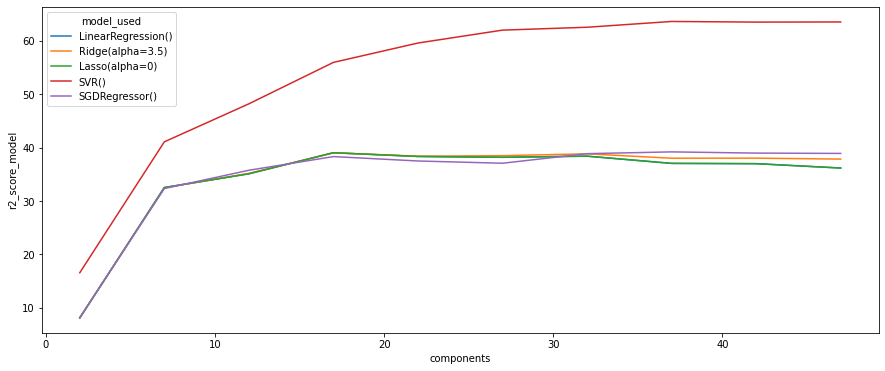

In [54]:
plt.figure(figsize=(15,6))
# sns.lineplot(x='components',y='r2_score_model',data=performance,hue='model_used').set_xticks(range(50))
sns.lineplot(x='components',y='r2_score_model',data=performance,hue='model_used')


In [55]:
# With PCA and crossvalidation regress models- SVM is the best with 65% score

## Using Tree based Models

### Decison Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(random_state=1)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

print('r2_score: ',r2_score(y_test,y_pred))


r2_score:  0.5460046752500991


### DecisionTreeRegressor with GridSearchCV


In [57]:
from sklearn.model_selection import GridSearchCV

params={'criterion' : ["mse", "friedman_mse", "mae", "poisson"],
'splitter':["best", "random"],'min_samples_split':[5,10,15,20,25],
'min_samples_leaf':[5,10,15,20,25,30],
'max_features':["auto", "sqrt", "log2"],
'max_leaf_nodes':[5,10,15,20,25,30]}

grid_search=GridSearchCV(param_grid=params,estimator=dt,scoring='r2',cv=10)
grid = grid_search.fit(x_train, y_train)
        

In [58]:
grid.best_estimator_


DecisionTreeRegressor(max_features='auto', max_leaf_nodes=25,
                      min_samples_leaf=10, min_samples_split=5, random_state=1,
                      splitter='random')

In [59]:
grid.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'max_leaf_nodes': 25,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'splitter': 'random'}

In [60]:
# This is the mean score for cross-validations
grid.best_score_

0.3761798611528827

In [61]:
y_pred=grid.best_estimator_.predict(x_test)

print ('RMSE: ',mean_squared_error(y_test,y_pred,squared=False))
print ('MSE: ',mean_squared_error(y_test,y_pred))
print ('R2: ', r2_score(y_test,y_pred))

RMSE:  0.3039871398187334
MSE:  0.09240818117517416
R2:  0.36862921914065105


In [62]:
grid.cv_results_

{'mean_fit_time': array([0.00602026, 0.00537128, 0.00568762, ..., 0.00427432, 0.00425303,
        0.00423238]),
 'std_fit_time': array([3.66766916e-04, 1.96956080e-04, 1.57391161e-04, ...,
        2.30734007e-05, 1.64101449e-05, 1.61141507e-05]),
 'mean_score_time': array([0.00298555, 0.00271747, 0.00281479, ..., 0.00269258, 0.0027036 ,
        0.00266273]),
 'std_score_time': array([2.11925554e-04, 5.98162186e-05, 1.48244848e-04, ...,
        1.81965864e-05, 4.76701300e-05, 8.20592971e-06]),
 'param_criterion': masked_array(data=['mse', 'mse', 'mse', ..., 'poisson', 'poisson',
                    'poisson'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', ..., 'log2', 'log2', 'log2'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_leaf_nodes': masked_array(data=[5, 

In [63]:
score_list=pd.DataFrame.from_dict(grid.cv_results_)
score_list.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_splitter,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
257,0.005931,0.000072,0.002657,0.000002,mse,auto,25,10,20,random,...,0.374848,0.081934,0.573436,0.334284,0.428619,0.151296,0.499965,0.376180,0.151286,1
255,0.005970,0.000091,0.002662,0.000027,mse,auto,25,10,15,random,...,0.374848,0.081934,0.573436,0.334284,0.428619,0.151296,0.499965,0.376180,0.151286,1
1337,0.006011,0.000074,0.002694,0.000005,friedman_mse,auto,25,10,20,random,...,0.374848,0.081934,0.573436,0.334284,0.428619,0.151296,0.499965,0.376180,0.151286,1
1335,0.005995,0.000094,0.002679,0.000039,friedman_mse,auto,25,10,15,random,...,0.374848,0.081934,0.573436,0.334284,0.428619,0.151296,0.499965,0.376180,0.151286,1
1333,0.006122,0.000078,0.002728,0.000016,friedman_mse,auto,25,10,10,random,...,0.374848,0.081934,0.573436,0.334284,0.428619,0.151296,0.499965,0.376180,0.151286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,0.005792,0.000110,0.002699,0.000052,poisson,auto,5,5,25,best,...,-0.004906,-0.005485,0.054780,-0.084775,-0.062348,-0.096071,0.008093,-0.020560,0.052900,4314
3964,0.004320,0.000026,0.002693,0.000013,poisson,log2,5,5,15,best,...,-0.046481,0.055087,-0.038625,-0.043938,0.011167,-0.047937,0.038525,-0.021968,0.058594,4317
3966,0.004322,0.000020,0.002689,0.000012,poisson,log2,5,5,20,best,...,-0.046481,0.055087,-0.038625,-0.053618,0.011167,-0.047937,0.038525,-0.022936,0.059027,4318
3780,0.004592,0.000064,0.002697,0.000014,poisson,sqrt,20,5,5,best,...,-0.135102,-0.103625,0.070941,-0.147833,-0.112235,-0.268102,0.260580,-0.024668,0.149998,4319


### Ensemble Techniques- Random Forest- Bagging

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print('r2 score:',r2_score(y_test,y_pred))


r2 score: 0.6371617868396451


In [65]:
# Using Grid-Search-CV

param={'n_estimators':[100,200,300],'max_depth': [15,20,25],
                     'min_samples_leaf': [25, 30, 35],
                     'max_leaf_nodes': [15, 20, 25]}
rf=RandomForestRegressor()
grid_rf=GridSearchCV(param_grid=param,estimator=rf,cv=10).fit(x_train,y_train)


In [66]:
grid_rf.best_params_

{'max_depth': 20,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 25,
 'n_estimators': 100}

In [67]:
grid_rf.best_score_

0.3549283716614418

In [68]:
y_pred=grid_rf.best_estimator_.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred))

r2 score: 0.3886394418517859


### Ensemble- Gradient_boosting

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor(n_estimators=300)
gbdt.fit(x_train,y_train)
y_pred=gbdt.predict(x_test)

print('r2 score:',r2_score(y_test,y_pred))


r2 score: 0.6205716630950981


In [70]:
# Using grid search CV

param={'learning_rate':[0.2,0.1,0.05],'n_estimators':[100,200,300],}
gbdt=GradientBoostingRegressor()
grid=GridSearchCV(estimator=gbdt,param_grid=param,cv=5).fit(x_train,y_train)


In [71]:
y_pred=grid.predict(x_test) # use the best model by default to predict
print('r2 score:',r2_score(y_test,y_pred))

# Among the best scores

r2 score: 0.6350372746353783


### Ensemble- Adaboosting

In [72]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=200,learning_rate=0.5)
ada.fit(x_train,y_train)

y_pred=ada.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred))

r2 score: 0.39470103338870544


### Ensemble- XGboost


In [73]:
import xgboost as xbg

xgb_mod=xgb.XGBRegressor(n_estimators=500,learning_rate=.2)
xgb_mod.fit(x_train,y_train)

y_pred=xgb_mod.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred))

# Best score yet

<IPython.core.display.Javascript object>

r2 score: 0.6763849208450359


In [74]:
xgb_mod.feature_importances_*100

array([3.25303465e-01, 6.96076751e-01, 3.43712211e-01, 3.19712639e-01,
       6.09208465e-01, 4.00575429e-01, 9.57383692e-01, 2.80210882e-01,
       1.63724199e-01, 2.31521940e+00, 5.56257069e-01, 4.01598722e-01,
       1.31647736e-01, 6.72290266e-01, 7.00551495e-02, 4.89400595e-01,
       1.38064015e+00, 9.26021576e-01, 2.07341433e-01, 8.93673420e-01,
       1.03410530e+00, 3.64082575e-01, 5.97362339e-01, 9.40047503e-01,
       6.08715773e-01, 0.00000000e+00, 1.56571269e-01, 3.13661754e-01,
       5.16080713e+00, 0.00000000e+00, 1.85703444e+00, 0.00000000e+00,
       1.56385434e+00, 9.89323735e-01, 3.43904048e-01, 7.46604979e-01,
       1.53943503e+00, 1.75771844e+00, 1.14727223e+00, 6.69907272e-01,
       9.78094161e-01, 1.71380115e+00, 1.01266551e+00, 6.67221844e-01,
       2.64158880e-04, 1.65453291e+00, 4.58305150e-01, 9.88951623e-01,
       4.12202644e+00, 3.16239864e-01, 3.86573910e-03, 1.98830944e-02,
       7.72090137e-01, 0.00000000e+00, 3.71552646e-01, 6.82569668e-02,
      

In [75]:
# Using PCA on the tree based models

from sklearn.decomposition import PCA

pca_trees=PCA(n_components=60)
pca_train=pca_trees.fit_transform(x_train)
pca_test=pca_trees.transform(x_test)


In [76]:
pca_trees.explained_variance_ratio_.sum()

0.9576989080469929

In [77]:
xgb_mod.fit(pca_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred=xgb_mod.predict(pca_test)
print('r2 score:',r2_score(y_test,y_pred))

r2 score: 0.5583476549338966


### Using PCA here doesn't help, using XGboost and checking feature importance here

In [79]:
xgb_mod=xgb.XGBRegressor(n_estimators=500,learning_rate=.2)
xgb_mod.fit(x_train,y_train)

y_pred=xgb_mod.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred))

# Best score yet

<IPython.core.display.Javascript object>

r2 score: 0.6763849208450359


In [80]:
# Feature Importance

k1=pd.DataFrame(xgb_mod.feature_importances_*100,columns=['feature_importance'])
k2=pd.DataFrame(x_train.columns,columns=['column_name'])
feat_imp=pd.concat([k1,k2],axis=1)
feat_imp['cum_sum']=feat_imp['feature_importance'].cumsum()


In [81]:
feat_imp.head(50)

# Top 80 features makes up to 97% of feature importance

,feature_importance,column_name,cum_sum
0,0.325303,Rating,0.325303
1,0.696077,Python,1.021380
2,0.343712,spark,1.365092
3,0.319713,aws,1.684805
4,0.609208,excel,2.294014
5,0.400575,sql,2.694589
6,0.957384,sas,3.651973
7,0.280211,keras,3.932184
8,0.163724,pytorch,4.095908
9,2.315219,scikit,6.411127
